## This notebook contains metadata about the dimensions of images.
It is validated that masks and images have matching dimensions. Frequency of unique sizes of images is obtained. Further decision is made to pad images to have square sizes.

In [2]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
image_dir = '/home/muhammad-ali/github/AMAP/segmentation/samples'
mask_dir = '/home/muhammad-ali/github/AMAP/segmentation/masks'

img_list = sorted(list(os.listdir(image_dir)))
mask_list = sorted(list(os.listdir(mask_dir)))

img_dirs = [os.path.join(image_dir, x) for x in img_list]
mask_dirs = [os.path.join(mask_dir, x)for x in mask_list]

images = [Image.open(x) for x in img_dirs]
masks = [Image.open(x) for x in mask_dirs]

print('number of images: ',len(img_dirs))
print('number of masks: ',len(mask_dirs))

number of images:  79
number of masks:  79


In [4]:
img_sizes = list(map(lambda x: x.size, images))
img_sizes = np.array(img_sizes)
img_nums = img_sizes.reshape(-1)
img_sizes = pd.DataFrame(img_sizes, columns =['width', 'length'])

mask_sizes = list(map(lambda x: x.size, masks))
mask_sizes = np.array(mask_sizes)
mask_nums = mask_sizes.reshape(-1)
mask_sizes = pd.DataFrame(mask_sizes, columns =['width', 'length'])

##### The dimensions are being checked because before running this notebook the images had not configured orientations

In [5]:
a = np.array(img_sizes) == np.array(mask_sizes)
print(f"It is {sum(a) == (len(images), len(masks))} that images and masks have the same width and length dimensions")

It is [ True  True] that images and masks have the same width and length dimensions


In [7]:
x = np.random.randint(60)
random_img = np.array(images[x])
random_mask = np.array(masks[x])
print('image rank -', random_img.ndim, 'with shape', random_img.shape)
print('mask rank -', random_mask.ndim, 'with shape', random_mask.shape)

image rank - 3 with shape (608, 406, 3)
mask rank - 2 with shape (608, 406)


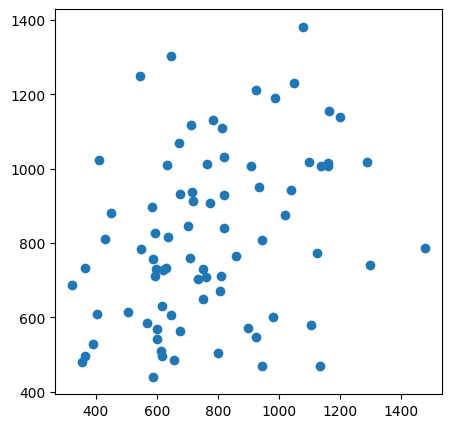

In [8]:
plt.figure(figsize=(5,5))
plt.scatter(img_sizes['width'], img_sizes['length'])

In [9]:
dimension_values = np.array(img_sizes)
uni_val, freq = np.unique(dimension_values, return_counts = True, axis = 0)
len(uni_val)

79

In [10]:
a = pd.DataFrame(uni_val, columns= ['width', 'length'])
b = pd.DataFrame(freq, columns= ['frequency'])
result = pd.concat([a,b], axis = 1)

In [49]:
result

,width,length,frequency
0,640,640,43
1,800,800,12
2,2048,2048,11
3,2686,2748,3
4,2713,2748,2
5,2829,2851,2
6,2864,2844,3
7,2976,3968,301
8,3000,4000,10
9,3024,4032,3
